In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data

df=pd.read_csv(r"C:\Users\Admin\Downloads\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# To find the number of rows and columns

df.shape

(891, 12)

There are 891 rows and 12 columns int the dataset

In [4]:
# To know the data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##  Exploratary data analysis

In [5]:
# Checking for missing values

missing_features=[feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in missing_features:
    print(feature, np.round(df[feature].isnull().mean(),4), '% missing values')

Age 0.1987 % missing values
Cabin 0.771 % missing values
Embarked 0.0022 % missing values


In this data the 3 features has missing values

In [6]:
df[missing_features].head()

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S


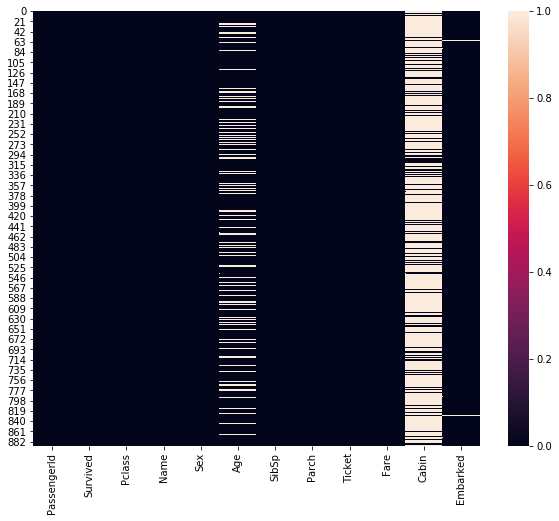

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [7]:
# checking for numerical features

numerical_feature=[feature for feature in df.columns if df[feature].dtype != 'O' ]
print("Number of numerical variables :", len(numerical_feature))

Number of numerical variables : 7


In [8]:
df[numerical_feature].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


There are 7 numerical columns in the dataset

In [10]:
# checking diiscrete numerical variables

discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<10]
print("Number of discrete features : ", len(discrete_feature))

Number of discrete features :  4


In [11]:
df[discrete_feature].head()

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0


There are 4 discrete numerical feature in the dataset

#### Univariate analysis of discrete numerical feature

Plotting for the univariate study

value counts of Survived feature
0    549
1    342
Name: Survived, dtype: int64
-----------------------------------


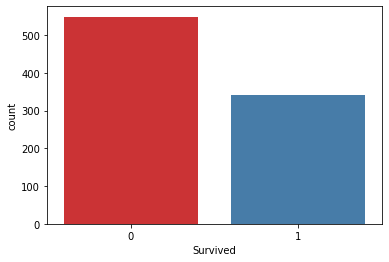

In [13]:
print('value counts of Survived feature')
print(df['Survived'].value_counts())
print('-----------------------------------')
sns.countplot(x='Survived',data=df,palette='Set1')

value counts of Pclass feature
3    491
1    216
2    184
Name: Pclass, dtype: int64
-----------------------------------


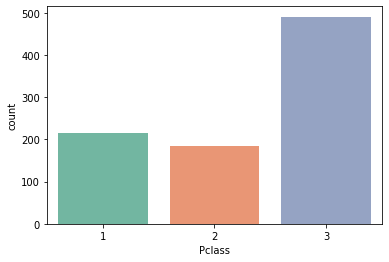

In [29]:
print('value counts of Pclass feature')
print(df['Pclass'].value_counts())
print('-----------------------------------')
sns.countplot(x='Pclass',data=df,palette='Set2')

value counts of SibSp feature
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
-----------------------------------


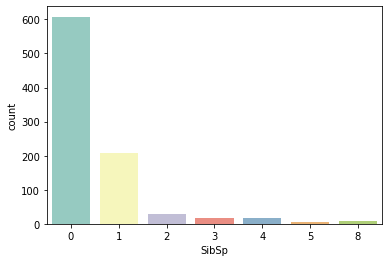

In [31]:
print('value counts of SibSp feature')
print(df['SibSp'].value_counts())
print('-----------------------------------')
sns.countplot(x='SibSp',data=df,palette='Set3')

value counts of Parch feature
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
-----------------------------------


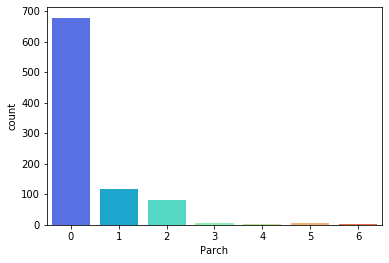

In [33]:
print('value counts of Parch feature')
print(df['Parch'].value_counts())
print('-----------------------------------')
sns.countplot(x='Parch',data=df,palette='rainbow')

In [14]:
# checking for continous numerical feature 

continous_feature=[feature for feature in numerical_feature if feature not in discrete_feature + ['PassengerId']]
print('Number of continous features : ',len(continous_feature))

Number of continous features :  2


Two continous numerical features are present

In [16]:
df[continous_feature].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


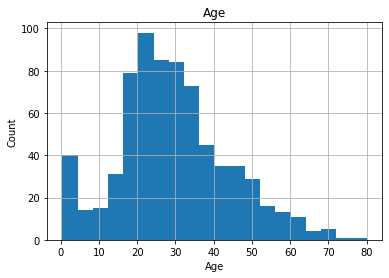

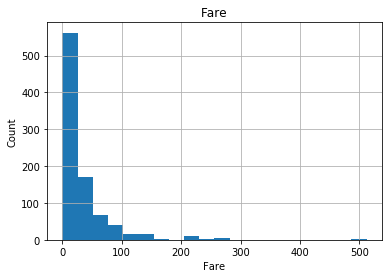

In [34]:
for feature in continous_feature:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

The plot is showing Age is slightly skewed and Fare is positively skewed and hence the transformation is needed

-----From the above histogram we can see how the feature is dominated from the normal distribution

----Age feature is slightly skewed
----Fare is highly positively skewed which needs transformation

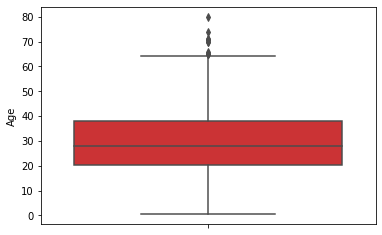

In [18]:
# to check the outliers  

sns.boxplot(x=df['Age'],orient='v',palette='Set1')

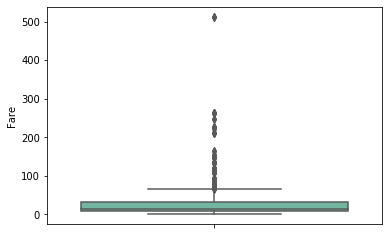

In [19]:
sns.boxplot(x=df['Fare'],orient='v',palette='Set2')

The feature Age and Fare has outliers it has to be treated

In [20]:
# checking the categorical features

categorical_feature=[feature for feature in df.columns if df[feature].dtype=="O"]
print('Number of categorical features :', len(categorical_feature))

Number of categorical features : 5


In [21]:
df[categorical_feature].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


There are five categorical feature in the dataset

In [23]:
for feature in categorical_feature:
    print('Number of unique values in',feature,'is', df[feature].nunique())

Number of unique values in Name is 891
Number of unique values in Sex is 2
Number of unique values in Ticket is 681
Number of unique values in Cabin is 147
Number of unique values in Embarked is 3


Since the feature Name has 891 unique values it has to be dropped from the data set

value counts of Sex feature
male      577
female    314
Name: Sex, dtype: int64
-----------------------------------


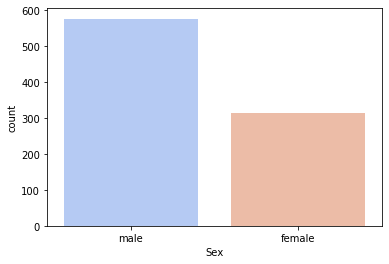

In [40]:
print('value counts of Sex feature')
print(df['Sex'].value_counts())
print('-----------------------------------')
sns.countplot(x='Sex',data=df,palette='coolwarm')

value counts of Embarked feature
S    644
C    168
Q     77
Name: Embarked, dtype: int64
-----------------------------------


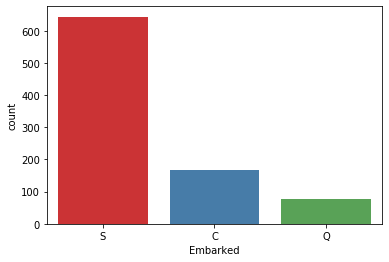

In [44]:
print('value counts of Embarked feature')
print(df['Embarked'].value_counts())
print('-----------------------------------')
sns.countplot(x='Embarked',data=df,palette='Set1')